# Week_7 복습과제

# 1. Default of credit card clients Data Set으로 PCA 성능 평가하기

default of credit card client Dataset의 column별 설명

*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars 
*   SEX: Gender (1=male, 2=female)
*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   MARRIAGE: Marital status (1=married, 2=single, 3=others)
*   AGE: Age in years
*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_2: Repayment status in August, 2005
*   PAY_3: Repayment status in July, 2005
*   PAY_4: Repayment status in June, 2005
*   PAY_5: Repayment status in May, 2005
*   PAY_6: Repayment status in April, 2005
*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)

## 1. 데이터 불러오기
#### 판다스에서 제공하는 read_excel()을 이용해 필요한 데이터를 불러와주세요.
#### 제공된 엑셀 파일에서 Data 이름의 시트만을 이용합니다. header=1, sheet_name='Data' 로 변수를 지정하고 수행해주세요.

### #1. 데이터를 불러와 불필요한 칼럼인 ID를 지운 후 df란 이름으로 저장하시오. 

ID 칼럼이 잘 삭제되었는지 확인하기 위해 df의 3번째 열까지 출력하세요.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel("C:\\Users\\LG-PC\\Desktop\\ERUON\\Euron data\\Week7_dataset.xls",header=1, sheet_name='Data')
print("기존의 columns 출력: ",df.columns)
del df['ID']
print("불필요 컬럼 지운 후 columns 출력: ",df.columns)
df.head(3)

기존의 columns 출력:  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
불필요 컬럼 지운 후 columns 출력:  Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### #2. 주어진 데이터의 행과 열의 개수를 출력하시오.

In [2]:
df.shape # 30000개의 행, 24개의 열

(30000, 24)

## 2. 데이터 전처리하기

주어진 데이터에서 타깃값은 'default payment next month' 속성으로, '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'일 경우 0입니다.

#### #1. 판다스에서 제공하는 rename() 함수를 이용해 원본 데이터셋에서 PAY_0을 PAY_1으로, 타깃 칼럼의 이름을 'default'으로 변경하시오.

코드를 시행한 후 변경한 데이터셋의 3번째 열까지 출력해 제대로 바뀌었는지 확인하세요.

In [3]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True) # rename() 함수로 특정 열의 이름을 새로운 이름으로 바꾸기
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

#### #2. 타깃값인 'default' 칼럼을 y_target 변수로 별도로 지정하고 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame (이름: X_features)으로 만드시오.

In [4]:
y_target=df['default']
X_features=df.iloc[:,0:23]
X_features.columns # 타겟 변수인 default를 제외하고 모든 열을 가져옴

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## 3. 각 속성 간의 상관도를 구하기
해당 데이터셋은 23개의 속성 데이터가 있으나, 각 속성끼리 상관도가 매우 높습니다. 
#### DataFrame의 corr()을 이용해 각 속성 간의 상관도를 구한 뒤 이를 Seaborn의 heatmap으로 시각화하시오.

In [5]:
X_features.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


figsize=(14,14)로 설정해주세요.
heatmap을 사용할 때 annot=True, fmt='.1g' 변수를 설정해주세요.

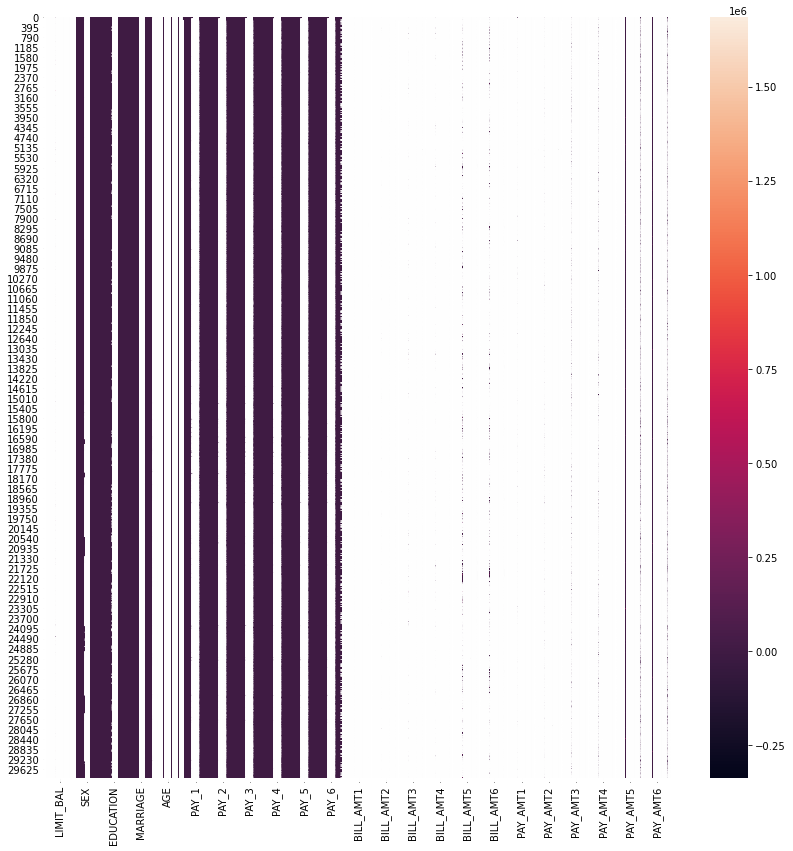

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,14))
sns.heatmap(X_features, annot=True, fmt='.1g') #각 셀에 숫자를 입력하는 옵션  annot=True, fmt='.1g'
plt.show()

## 3. PCA

#### 위에서 구한 상관도를 통해 BILL_AMT1 ~ BILL_AMT6까지 6개의 속성들이 0.9 이상으로 상관도가 매우 높다는 것을 알 수 있습니다.
#### 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있습니다.
#### 따라서 BILL__AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환할 수 있다.

#### #1. BILL_AMT1 ~ BIL_AMT6까지 6개의 속성명을 생성해 cols_bill이란 이름으로 저장하시오.

###### 힌트: for문으로 'BILL_AMT'란 문자열과 str()함수, 그리고 range()함수를 이용해 칼럼명을 생성하세요.

In [14]:
cols_bill=X_features[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]

In [15]:
## 제대로 cols_bill이 만들어졌는지 확인
cols_bill.columns

Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'],
      dtype='object')

#### #2. StandardScaler와 cols_bill을 이용해 BILL_AMT1 ~ BILL_AMT6까지의 속성들을 scale하고 cols_scaled란 이름으로 저장하시오.



In [16]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(cols_bill))
cols_scaled = standardScaler.transform(cols_bill)

StandardScaler()


#### #3. 2개의 PCA 속성을 가진 PCA 객체를 이용해 cols_scaled 데이터의 component별 변동성을 출력하시오.

PCA의 explained_variance_ratio_ 변수를 출력하면 됩니다. 이때 이 계산을 위해 fit()을 호출해주세요.


In [17]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X2D=pca.fit_transform(cols_scaled)

In [19]:
### PCA component별 변동성 확인
pca.explained_variance_ratio_ 

array([0.90555253, 0.0509867 ])

위에서 얻은 변동성 결과로 6가지 속성들의 상관도를 평가해보세요. (어떤 축을 기준으로 판단했는지도 명시해주세요.)

    -> 첫번째 주성분이 90.5%, 두 번쟤 주성분이 약 5%를 설명해,
    두 개의 주성분이 6개 속성의 변동성의 약 95%를 설명함을 확인 할 수 있습니다.

    -> 특히 첫 번 쟤 주성분이 90%라는 상당한 변동성을 설명하고 있음도 알 수 있습니다.

답: 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있다. 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높다.

## 4. 원본 데이터셋과 PCA 변환 데이터셋의 분류 예측 결과 비교

이 문제에서는 X_features와 y_target을 이용합니다.

#### #1. 랜덤 포레스트를 이용해 원본 데이터셋을 교차 검증 세트로 분류 예측하시오.
#### 랜덤포레스트에서 n_estimators=300, random_state=156 이라는 변수를 설정해주세요.
#### 교차검증시 scoring='accuracy', cv=3 으로 변수를 설정해주세요.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rnd_clf=RandomForestClassifier(n_estimators=300, random_state=156)
score_list=cross_val_score(rnd_clf, X_features, y_target, scoring="accuracy",cv=3)

#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [35]:
n=1
for x in score_list:
    print("cv",n,"=",x)
    n=n+1
print("평균 정확도:", "{:.4f}".format(np.mean(score_list))) #{:.4f}".format() : 원하는 소수점 자리까지 출력하기 위한 옵션

cv 1 = 0.8083
cv 2 = 0.8196
cv 3 = 0.8232
평균 정확도: 0.8170


#### #2. 6개의 컴포넌트를 가진 변환을 수행한 후 같은 조건으로 분류 예측하시오.


1.   먼저 StandardScaler를 이용해 원본 데이터를 scale하세요.
2.   n_components=6인 PCA 변환을 수행한 후, 교차 검증 세트로 분류 예측하세요.



In [41]:
# 먼저, StandardScaler 로 원본 데이터 scale
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(X_features))
X_feaures_scaled = standardScaler.transform(X_features)

# n_components=6 인 PCA 변환
from sklearn.decomposition import PCA

pca=PCA(n_components=6)
X2D=pca.fit_transform(X_feaures_scaled)
pca_columns=["comp1","comp2","comp3","comp4","comp5","comp6"]
pca_df=pd.DataFrame(X2D,columns=pca_columns)


# 교차 검증 세트로 분류 예측

scores_pca = cross_val_score(rnd_clf, pca_df, y_target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

StandardScaler()
PCA 변환 데이터 교차 검증 개별 정확도: [0.7909 0.7993 0.8026]
PCA 변환 데이터 평균 정확도: 0.7976000000000001


#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [42]:
n=1
for x in scores_pca:
    print("cv",n,"=",x)
    n=n+1
print("평균 정확도:", "{:.4f}".format(np.mean(scores_pca))) #{:.4f}".format() : 원하는 소수점 자리까지 출력하기 위한 옵션

cv 1 = 0.7909
cv 2 = 0.7993
cv 3 = 0.8026
평균 정확도: 0.7976


PCA의 예측성능이 저하되었는가?
이를 기준으로 PCA의 압축 능력을 판단하세요. (좋음, 보통, 나쁨)

    답: PCA를 적용한 이후 예측 성능이 약 2% 저하된 것을 볼 수 있다. 
    하지만, 원본의 23개의 속성을 6개의 속성으로 대폭 축소한 것을 고려한다면 PCA 변환 이후에도 원본 데이터의 특성을 상당 부분 유지함을 알 수 있다. 

# 2. (연습문제 10) MNIST 데이터셋을 LDA 알고리즘으로 분류하고 평가하기

#### 1. 사이킷런의 fetch_openml()을 이용해 mnist 데이터셋을 불러오세요.
#### mnist의 target값의 경우 astype()을 이용해 uint8 데이터타입으로 변환해주세요.

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

#### 2. mnist 데이터셋의 data 칼럼을 X에, target 칼럼을 y에 저장하세요.

In [50]:
X=mnist.data
y=mnist.target
y=y.astype('uint8')

다음은 산점도를 그릴 때 보기 좋도록 하는 함수입니다. 한번 꼭 돌려주세요!

In [58]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl


def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

#### 3. 2개의 component를 가진 LDA로 mnist 데이터셋을 변환시키고, 이 변환을 수행하는데 걸린 시간과 산점도를 출력하세요. (figsize=(12,12))

In [63]:
# LDA : 선형 판별 분석
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

start = time.time()

lda=LDA(n_components=2) # 2개의 component 로 설정
data_reduced=lda.fit_transform(X,y) # 축소된 훈련, 테스트 데이터 생성

print(time.time()-start)

18.360724687576294


In [65]:
data_reduced

array([[-0.9815313 , -0.60674231],
       [-3.05892432, -3.05284985],
       [ 1.85791007, -0.05752316],
       ...,
       [ 3.12523695, -0.84419027],
       [-0.92950977,  0.79599839],
       [-3.78310457, -1.7814597 ]])

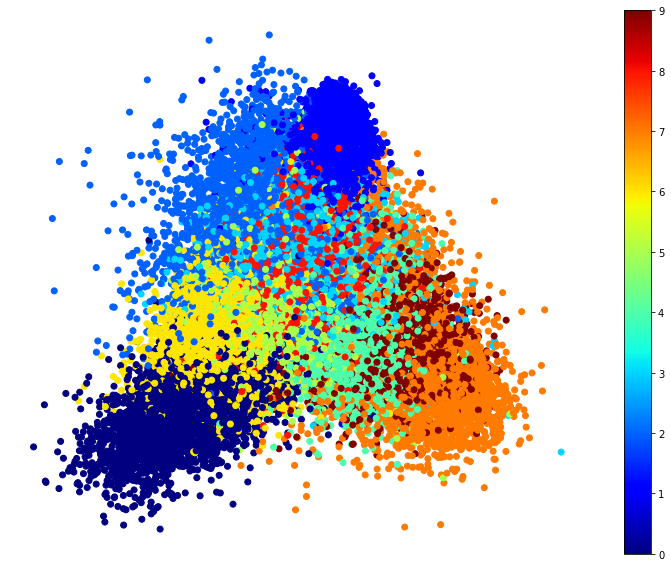

In [68]:
plt.figure(figsize=(13,10))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1],c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

LDA의 성능을 평가하시오. (좋음/보통/나쁨 + 이유)

답: 18초가 걸리지만 데이터에 대한 분류가 잘 이루어진 것으로 보인다. 물론 중간 부분을 보면 여러 숫자가 섞였다. 이상적인 형태로 구분이 이루어지지는 않았지만, 이를 위해서는 각 숫자별로 따로 데이터를 살펴볼 필요가 있어보입니다.  

#### 4. 분산의 95%를 보존하도록 먼저 PCA를 적용한 뒤 LDA를 시행하는 파이프라인을 만들고, 이 파이프라인의 수행시간과 산점도를 출력하세요.

PCA+LDA 시간: 10.6s.


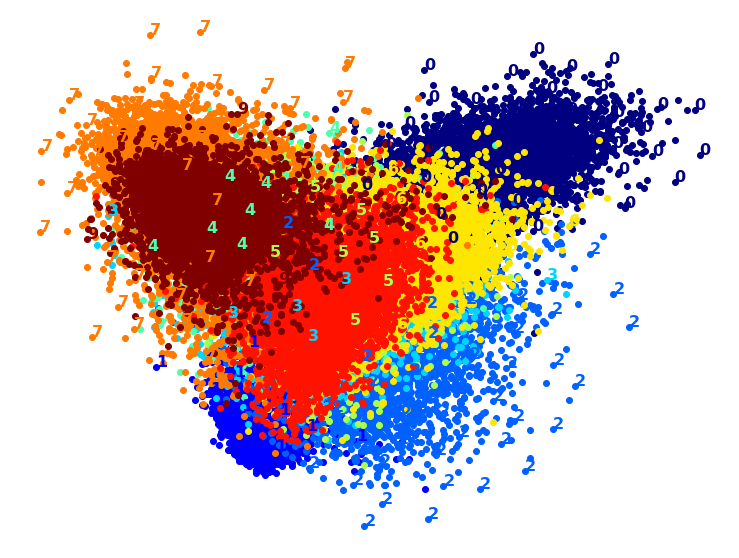

In [72]:
from sklearn.pipeline import Pipeline

pca_lda = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("LDA", LDA(n_components=2)),
])
t0 = time.time()
X_pca_lda_reduced = pca_lda.fit_transform(X,y)
t1 = time.time()
print("PCA+LDA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lda_reduced, y)
plt.show()

LDA 알고리즘만을 수행했을 때보다 성능이 더 좋아졌는가? 수행시간과 산점도에 대해 각각 평가하세요. (더 좋아짐/그대로/더 나빠짐)

답: LDA만 수행했을 때는 18초였던 것에 비해 파이프라인을 이용해 두 모델을 나누어 시행하니 10초 대로 줄어들었다. 
산점도를 보아도 훨씬 군집화가 잘 이루어 진 것을 볼 수 있다. 